/tmp/ipykernel_4028042/661811451.py:16: RuntimeWarning: divide by zero encountered in log
  free_energy = -R * T * np.log(probabilities)


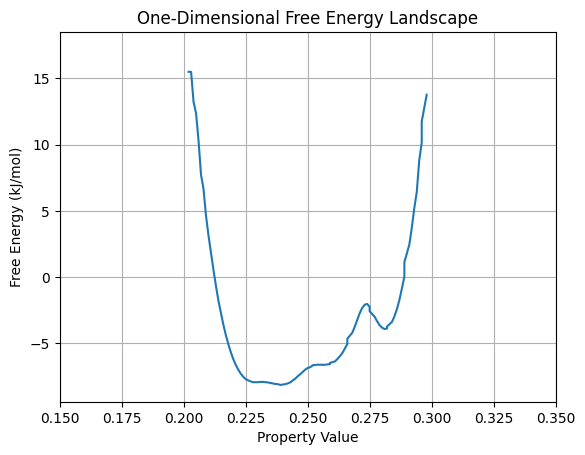

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Read data from file
file_path = "bonds-1.dat"  # Update with your file path
data = np.loadtxt(file_path)

# Extract property values and probabilities
property_values = data[:, 0]
probabilities = data[:, 1]

# Boltzmann inversion to calculate free energy
R = 8.314  # Boltzmann constant in J/K
T = 300  # Temperature in Kelvin

free_energy = -R * T * np.log(probabilities)
# Convert from Joules to kJ/mol
free_energy_kJ_per_mol = free_energy / 1000

# Plot free energy landscape
plt.plot(property_values, free_energy_kJ_per_mol)
plt.xlabel('Property Value')
plt.ylabel('Free Energy (kJ/mol)')
plt.xlim(0.15, 0.35)
plt.title('One-Dimensional Free Energy Landscape')
plt.grid(True)
plt.show()

In [37]:
# Save free energy landscape data to a file
output_file = "free_energy_landscape.dat"
np.savetxt(output_file, np.column_stack((property_values, free_energy)), header="Property Value\tFree Energy (J)", delimiter="\t", comments="")
print(f"Free energy landscape saved to {output_file}")

Free energy landscape saved to free_energy_landscape.dat


In [51]:
import numpy as np
from scipy.optimize import curve_fit

# Define the function you want to fit
def model_function(B, K, B0):
    return 0.5 * K * (B - B0)**2

# Load data from file
data = np.loadtxt('free_energy_landscape.dat')  # Replace 'data_file.txt' with your file name
B_data = data[:, 0]
Y_data = data[:, 1]

# Get the known value of B0 from the user
B0 = 0.24

# Provide an initial guess for the parameter K
initial_guess = [0.0]  # Provide an initial guess for K

# Perform the curve fitting
params, covariance = curve_fit(model_function, B_data, Y_data, p0=initial_guess + [B0])

# Extract the optimized parameters
K_optimized = params[0]

# Print the optimized value of K
print("Optimized K value:", K_optimized, "kJ/mol/nm^2")

# You can provide units based on the units of your data and the equation
# For example, if B has units of meters and Y has units of seconds,
# then K would have units of (meters^2/seconds)

Optimized K value: 3620623.720755791 kJ/mol/nm^2


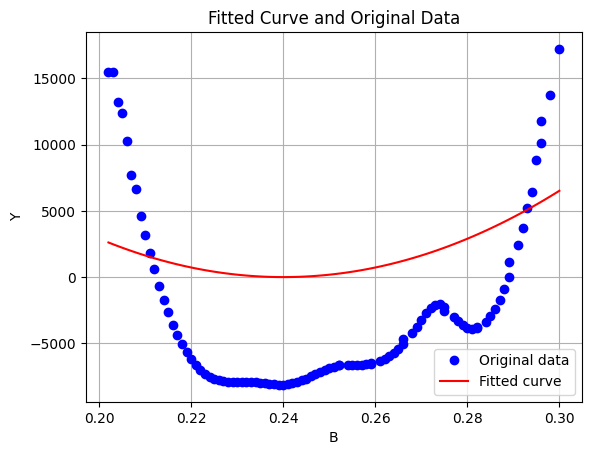

In [52]:
# Generate data points for the fitted curve
B_fit = np.linspace(min(B_data), max(B_data), 100)
Y_fit = model_function(B_fit, K_optimized, B0)

# Plot the original data and the fitted curve
plt.figure()
plt.plot(B_data, Y_data, 'bo', label='Original data')
plt.plot(B_fit, Y_fit, 'r-', label='Fitted curve')
plt.xlabel('B')
plt.ylabel('Y')
plt.title('Fitted Curve and Original Data')
plt.legend()
plt.grid(True)
plt.show()